In [90]:
import pandas
df = pandas.read_csv("ANS.csv", engine='python')

In [97]:
df.size

905634

In [94]:
mark = ("Heart Rate", \
        "Respiratory Rate", \
        "Non Invasive Blood Pressure systolic", \
        "Non Invasive Blood Pressure diastolic", \
        "O2 saturation pulseoxymetry", \
        "Temperature Celsius")
df.dropna(inplace=True)
df_under, df_under_label = df[list(mark)], df.label

In [67]:
from imblearn.under_sampling import RandomUnderSampler
print("Before\t", sum(df_under_label) / len(df_under_label))
df_under_resample, df_under_label_resample = RandomUnderSampler(sampling_strategy='majority').fit_resample(df_under, df_under_label)
print("After \t", sum(df_under_label_resample) / len(df_under_label_resample))

Before	 0.0003180092620197563
After 	 0.5


In [68]:
sum(df_under_label)

32

In [69]:
df_under_resample = (df_under_resample - df_under_resample.mean()) / df_under_resample.std()
# df_under_resample

In [70]:
df_under_resample[:6]

,Heart Rate,Respiratory Rate,Non Invasive Blood Pressure systolic,Non Invasive Blood Pressure diastolic,O2 saturation pulseoxymetry,Temperature Celsius
0,-0.734873,-0.980739,-0.432547,0.086245,0.769811,0.984680
1,-0.992412,-1.121252,0.707427,-0.443857,0.577958,-3.833326
2,-0.013762,-0.980739,0.159504,0.444064,0.482031,0.213799
3,-0.812135,-1.261766,2.068041,-0.443857,0.577958,0.213799
4,0.192269,2.672607,-0.395773,0.682611,0.194251,-0.171641
5,-0.786381,-0.840226,0.192600,-0.178806,0.194251,1.562841


In [71]:
df_under_resample.std()

Heart Rate                               1.0
Respiratory Rate                         1.0
Non Invasive Blood Pressure systolic     1.0
Non Invasive Blood Pressure diastolic    1.0
O2 saturation pulseoxymetry              1.0
Temperature Celsius                      1.0
dtype: float64

In [72]:
df_under_resample.mean()

Heart Rate                              -2.949030e-16
Respiratory Rate                        -1.179612e-16
Non Invasive Blood Pressure systolic    -9.367507e-17
Non Invasive Blood Pressure diastolic    2.012279e-16
O2 saturation pulseoxymetry              5.481726e-16
Temperature Celsius                      1.029038e-14
dtype: float64

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_under_resample, df_under_label_resample, test_size=0.2, stratify=df_under_label_resample)

In [74]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=3)
model = model.fit(X_train, y_train)

[Text(0.4230769230769231, 0.875, 'x[1] <= -0.067\ngini = 0.5\nsamples = 51\nvalue = [25, 26]'),
 Text(0.15384615384615385, 0.625, 'x[2] <= -1.021\ngini = 0.278\nsamples = 24\nvalue = [20, 4]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.23076923076923078, 0.375, 'x[1] <= -1.669\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.6923076923076923, 0.625, 'x[3] <= 0.186\ngini = 0.302\nsamples = 27\nvalue = [5, 22]'),
 Text(0.5384615384615384, 0.375, 'x[5] <= 2.623\ngini = 0.087\nsamples = 22\nvalue = [1, 21]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8461538461538461, 0.375, 'x[3] <= 2.67\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.7692307692307693, 0.125,

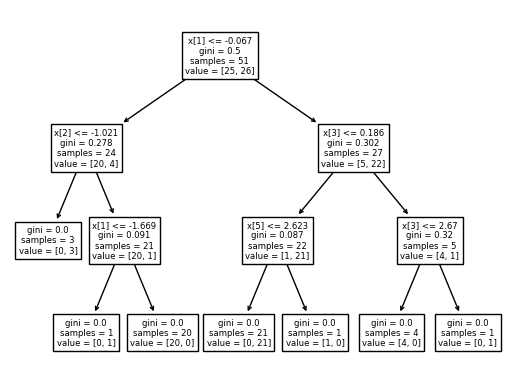

In [75]:
tree.plot_tree(model)

In [76]:
import graphviz
from graphviz import Digraph, Source
features = list(mark)
dot_data = tree.export_graphviz(model, feature_names=features)
graph = Source(dot_data)

In [77]:
len(X_train)

51

In [78]:
model.score(X_test, y_test)

0.9230769230769231

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,StratifiedKFold

In [89]:
scores = 0
for i in range(100):
    scores += cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy').mean()
scores / 100

0.6530000000000009